# Bases de Datos III: Tarea Nº3 (20%)

## 1. Importacion del dataset

### 1.1 Descripción de los datos

**Track.Name** *(String - cadena de texto)*: 
- Descripción: Nombre de la pista o canción.

**Artist.Name** *(String - cadena de texto)*:
  - Descripción: Nombre del artista o banda que interpreta la canción.

**Genre** *(String - cadena de texto)*:
  - Descripción: Género musical al que pertenece la canción.

**Beats.Per.Minute** *(Integer - entero)*:
  - Descripción: Los latidos por minuto de la canción, un indicativo de su tempo.

**Energy** *(Integer - entero)*:
  - Descripción: Medida de intensidad y actividad.

**Danceability** *(Integer - entero)*:
  - Descripción: Medida de cuán adecuada es una canción para bailar.

**Loudness..dB..** *(Integer - entero)*:
  - Descripción: Volumen de la canción en decibelios.

**Liveness** *(Integer - entero)*:
  - Descripción: Presencia de público en la grabación de la canción. Un valor alto indica que es una grabación en vivo.

**Valence.** *(Integer - entero)*:
  - Descripción: Medida de positividad en la canción.

**Length.** *(Integer - entero)*:
  - Descripción: Duración de la canción en segundos.

**Acousticness..** *(Integer - entero)*:
  - Descripción: Medida que indica cuán acústica es una canción.

**Speechiness.** *(Integer - entero)*:
  - Descripción: Medida que indica la presencia de palabras habladas en la canción.

**Popularity** *(Integer - entero)*:
  - Descripción: Popularidad de la canción en Spotify.

### 1.2 Importacion de los datos

In [395]:
import pandas as pd

# Cargar CSV 
spotify = pd.read_csv("./data/50MasEscuchadosSpotify.csv", encoding='ISO-8859-1')

In [396]:
spotify.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### 1.3 Importacion de librerias

In [397]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Pre-procesamiento de los datos

### 2.1 Selección de los caracteristicas

In [398]:
# Seleccionar características para la agrupación
features = spotify[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']]

In [401]:
features.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94


In [414]:
len(features)

50

In [411]:
print(features.dtypes)

Beats.Per.Minute    float64
Energy              float64
Danceability        float64
Loudness..dB..        int64
Liveness              int64
Valence.            float64
Length.               int64
Acousticness..        int64
Speechiness.          int64
Popularity            int64
dtype: object


In [412]:
features = features.astype('float64')

### 2.2 Tratar valores atipicos

In [413]:
import numpy as np

# Calcular los Z-Scores
z_scores = np.abs((features - features.mean()) / features.std())

# Identificar valores atípicos (Asumiendo un umbral de 3 para los Z-Scores)
outliers_mask = (z_scores >= 3)

# Reemplazar los valores atípicos por la mediana de cada columna
for column in features.columns:
    median_value = features[column].median()
    features.loc[outliers_mask[column], column] = median_value


In [415]:
print(features)
print(len(features))

    Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  \
0              117.0    55.0         76.00            -6.0       8.0   
1              105.0    81.0         79.00            -4.0       8.0   
2              190.0    80.0         73.75            -4.0      16.0   
3               93.0    65.0         64.00            -8.0       8.0   
4              150.0    65.0         58.00            -4.0      11.0   
5              102.0    68.0         80.00            -5.0       9.0   
6              180.0    64.0         75.00            -6.0       7.0   
7              111.0    68.0         48.00            -5.0       8.0   
8              136.0    62.0         88.00            -6.0      11.0   
9              135.0    43.0         70.00           -11.0      10.0   
10             176.0    62.0         61.00            -5.0      24.0   
11              96.0    71.0         82.00            -4.0      15.0   
12             110.0    41.0         50.00            -6.0      

### 2.3 Normalización de los datos

In [416]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [417]:
print(features_scaled)
print(len(features_scaled))

[[-0.10003973 -0.64306057  0.33816678 -0.16701216 -0.63084424  0.92259536
  -0.25702919 -0.96571922 -0.87170148 -2.40956669]
 [-0.4923524   1.20236711  0.67024545  0.81541229 -0.63084424  0.28944168
   2.6074527  -0.75300573 -0.27052805  1.12591491]
 [ 2.28652901  1.13138912  0.08910778  0.81541229  0.36653795  0.69646905
  -0.3860599  -0.54029225 -0.47091919 -0.77780595]
 [-0.88466507  0.06671931 -0.99014791 -1.14943661 -0.63084424  0.01809011
  -0.07638618 -0.54029225  0.73142768 -0.50584583]
 [ 0.97882011  0.06671931 -1.65430526  0.81541229 -0.25682591 -1.65524462
  -0.66992748  1.21459399 -0.47091919  1.66983516]
 [-0.59043057  0.27965327  0.78093835  0.32420007 -0.50617146  1.32962272
   0.49134897 -0.69982736 -0.77150591 -1.04976608]
 [ 1.95960178 -0.00425868  0.22747389 -0.16701216 -0.75551701 -1.4291183
  -1.80539777 -1.07207596  1.7333834   1.12591491]
 [-0.29619607  0.27965327 -2.76123417  0.32420007 -0.63084424 -0.88641515
   0.02683839 -0.38075714 -0.27052805  0.58199466]
 

### 2.4 Reduccion de dimensionalidad

In [418]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(features_scaled)

In [419]:
print(data_pca)
print(len(data_pca))

[[-1.00180977 -2.23417425 -0.32140456 -0.21231012 -0.2515308   0.73732689
   1.25655612  0.89879406 -0.09109062]
 [-1.84290307  0.69068186 -0.54231488  1.89292999  0.45268808 -1.39023232
  -0.98516395 -0.03322776 -1.01705948]
 [-1.32419926  0.96695728 -1.25531101 -0.87515007 -0.38957162  0.76967546
   1.74033007 -0.224788   -0.2840255 ]
 [ 0.5738675  -0.53786146  0.06986515  0.45077212  0.07976869  0.28782194
  -0.44558284  1.68394536  0.72939426]
 [ 1.25410908  2.11750199  1.04038079 -1.04537413  1.21851756 -1.24175013
   0.77885984 -0.3261995   0.05695751]
 [-1.766473   -1.34332102 -0.40602555  0.07184281 -0.32863492 -0.02304148
  -0.06995205  0.41410219 -0.39815062]
 [ 1.92741053  1.25274126 -2.39705287 -0.6462464   1.54196777  0.5696335
   0.43503621 -0.35872002  0.86351584]
 [ 0.32316308  1.38036904  1.23706171 -0.04819547  1.34660413 -0.58747328
   0.44904378  1.88949401  0.40222099]
 [-0.23799316 -1.04788944 -1.50773277 -0.78972124  0.40233208  0.8411335
  -0.07434724 -0.7426059

### 2.5 Datos finales

In [420]:
# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")

# Ver las cargas (loadings) de las características para cada componente principal
loadings = pca.components_
for i, component in enumerate(loadings):
    print(f"\nComponente {i + 1}:")
    for feature, loading in zip(features.columns, component):
        print(f"{feature}: {loading}")


Varianza explicada por cada componente: [0.23119104 0.16647172 0.1445955  0.10832103 0.09426748 0.08370242
 0.06302012 0.05746022 0.02902962]

Componente 1:
Beats.Per.Minute: 0.16607558822698815
Energy: -0.5290212229979157
Danceability: -0.13591680736277428
Loudness..dB..: -0.4921694514401575
Liveness: -0.07209570275765619
Valence.: -0.3677440752242953
Length.: -0.20654701399941974
Acousticness..: 0.2623436693393165
Speechiness.: 0.3554748722406192
Popularity: 0.23145096091955222

Componente 2:
Beats.Per.Minute: 0.39170518008582644
Energy: 0.3251285130823581
Danceability: -0.44546329161946313
Loudness..dB..: 0.2934036897756445
Liveness: 0.3291803658055048
Valence.: -0.06165768492925602
Length.: 0.10377925354910085
Acousticness..: 0.022908687438046128
Speechiness.: 0.2421675767715532
Popularity: 0.5236733452362689

Componente 3:
Beats.Per.Minute: -0.4833334365155764
Energy: -0.1415961089045175
Danceability: -0.4467177926087129
Loudness..dB..: 0.033618374267073904
Liveness: 0.40596456011

## 4. Análisis de clústers

### 4.1 Análisis Partitioning Clustering: K-means

#### 4.1.1 Justificacion

**¿En qué consiste?**
El algoritmo KMeans busca particionar un conjunto de puntos en K grupos, donde cada punto pertenece al grupo cuyo centroide está más cerca. El algoritmo de "MiniBatch" en MiniBatchKMeans es una variante de KMeans que utiliza mini-lotes para reducir el tiempo de cómputo. Mientras que el algoritmo estándar KMeans utiliza todos los datos disponibles en cada iteración para recalcular los centroides, MiniBatchKMeans utiliza solo una pequeña muestra aleatoria en cada iteración. Esta aproximación acelera significativamente el algoritmo y lo hace apto para conjuntos de datos grandes.

**Propósito**
El propósito principal de MiniBatchKMeans es realizar una agrupación de los datos basada en la proximidad a centroides específicos pero de una manera más eficiente en términos de tiempo de cómputo en comparación con el KMeans estándar, especialmente cuando se trabaja con grandes volúmenes de datos.

**¿Por qué es adecuado para esta instancia?**

1. **Eficiencia**: Si tu conjunto de datos es bastante grande, el MiniBatchKMeans puede ser una excelente opción debido a su eficiencia computacional.
2. **Simplicidad**: A pesar de ser una variante, sigue siendo un método intuitivo y fácil de interpretar.
3. **Resultados similares a KMeans**: A pesar de su eficiencia, en muchos casos, produce resultados muy similares al KMeans estándar.

**Conclusión**
Dado el propósito de agrupar datos en clústeres basados en la similitud y considerando la eficiencia y simplicidad de MiniBatchKMeans, este método parece ser una elección adecuada para nuestro análisis de Partitioning Clustering en el conjunto de datos actual. Es especialmente beneficioso si esperamos que los futuros conjuntos de datos con los que trabajaremos sean más grandes, ya que nos brinda una herramienta escalable.

#### 4.1.2 Elección del número óptimo de clústers con el método Elbow

##### 4.1.2.1 Justifacion

El Método Elbow, también conocido como método del codo, es una técnica utilizada en análisis de clustering para determinar el número óptimo de clusters en un conjunto de datos. La técnica implica trazar la variación explicada, en este caso denominada "distorsión", en función del número de clusters. A medida que aumenta el número de clusters, la distorsión generalmente disminuye. Esto se debe a que, cuando hay más clusters, los puntos de datos tienden a estar más cerca de los centroides de sus respectivos clusters. Sin embargo, aumentar el número de clusters más allá de un cierto punto resulta en rendimientos decrecientes en términos de reducción de distorsión. El objetivo es identificar el punto en el que agregar más clusters ya no proporciona un beneficio significativo en términos de disminución de la distorsión. Este punto se asemeja a un "codo" en el gráfico, de ahí el nombre del método.

Elegimos usar el Método Elbow porque nos permite tomar una decisión informada sobre cuántos clusters utilizar basándonos en un criterio cuantitativo. En lugar de hacer una elección arbitraria o basarse únicamente en el conocimiento del dominio, el Método Elbow nos da una pauta visual y cuantitativa para esta decisión crucial en el análisis de clustering.

##### 4.1.2.2 Aplicación del método Elbow

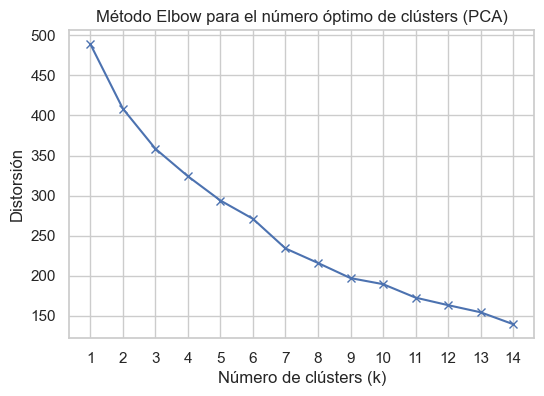

In [422]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método Elbow para encontrar el número óptimo de clústers
distortions = []
K = list(range(1, 15))

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeanModel.fit(data_pca)
    distortions.append(kmeanModel.inertia_)

# Graficar el método Elbow
plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clústers (k)')
plt.ylabel('Distorsión')
plt.title('Método Elbow para el número óptimo de clústers (PCA)')
plt.xticks(range(1, 15))
plt.show()


##### 4.1.2.3 Interpretación de los Resultados del Método Elbow

Al observar el gráfico generado por el Método Elbow para nuestros datos, notamos que la distorsión disminuye rápidamente desde 2 hasta aproximadamente 5 clusters. Posteriormente, la tasa de disminución de la distorsión comienza a nivelarse y se estabiliza. El "codo" del gráfico, que indica el punto en el que la reducción de la distorsión empieza a ser menos significativa al agregar más clusters, parece estar alrededor de k=5. Por lo tanto, podemos concluir que el número óptimo de clusters para nuestros datos es 5.

#### 4.1.3 Clasificación con el modelo

In [423]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 5

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data_pca)

print(kmeans.labels_)

spotify['Cluster'] = kmeans.labels_

[1 2 2 1 4 1 4 4 1 0 4 1 4 2 1 1 2 1 1 4 1 4 2 2 0 2 1 1 2 3 1 0 1 1 3 4 2
 3 2 1 1 1 4 1 1 1 2 2 3 1]


In [470]:
spotify[['Track.Name', 'Artist.Name', 'Genre', 'Cluster']].head()

,Track.Name,Artist.Name,Genre,Cluster
0,Señorita,Shawn Mendes,canadian pop,1
1,China,Anuel AA,reggaeton flow,2
2,boyfriend (with Social House),Ariana Grande,dance pop,2
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,1
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,4


#### 4.1.5 Gráficos

##### 4.1.5.1 Gráfico bidimensional

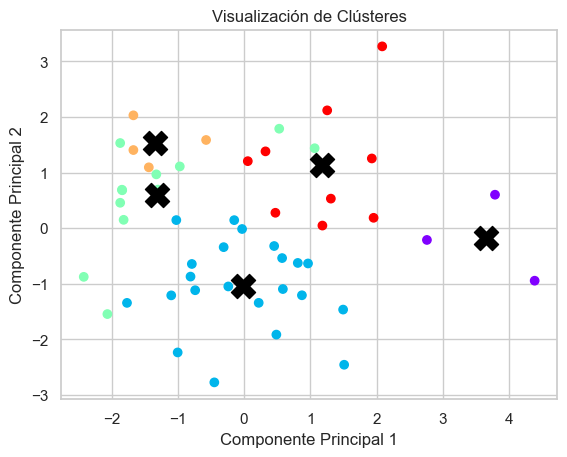

In [468]:
import matplotlib.pyplot as plt

# Visualización de los clústeres
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
# Visualización de los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
plt.title("Visualización de Clústeres")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


##### 4.1.5.3 gráfico de pastel (o gráfico circular) para visualizar los porcentajes de datos en cada cluster

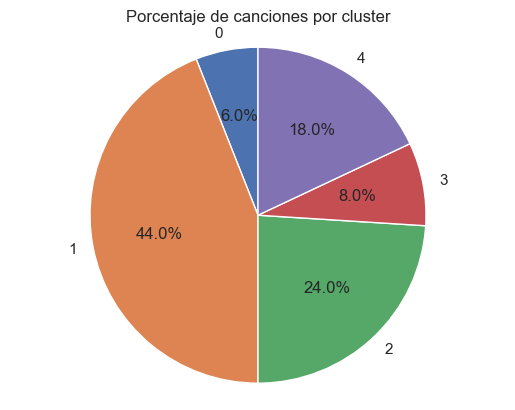

In [467]:
# Agrupación por cluster y conteo
cluster_counts = spotify['Cluster'].value_counts().sort_index()

# Gráfico de pastel
fig, ax = plt.subplots()
ax.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 
plt.title('Porcentaje de canciones por cluster')
plt.show()

#### 4.1.4 Matriz de confusión

In [471]:
print(spotify['Cluster'].value_counts())


Cluster
1    22
2    12
4     9
3     4
0     3
Name: count, dtype: int64


In [474]:
# Crear matriz de confusión
confusion_matrix = pd.crosstab(spotify['Genre'], spotify['Cluster'], rownames=['Generos'], colnames=['Clusters'])
print(confusion_matrix)


Clusters          0  1  2  3  4
Generos                        
atl hip hop       0  1  0  0  0
australian pop    0  1  0  0  0
big room          0  0  0  0  1
boy band          0  0  1  0  0
brostep           0  1  1  0  0
canadian hip hop  0  3  0  0  0
canadian pop      0  1  1  0  0
country rap       0  1  0  0  1
dance pop         1  4  1  1  1
dfw rap           0  1  0  0  1
edm               0  2  0  1  0
electropop        2  0  0  0  0
escape room       0  0  0  0  1
latin             0  0  4  1  0
panamanian pop    0  0  2  0  0
pop               0  4  0  1  2
pop house         0  1  0  0  0
r&b en espanol    0  1  0  0  0
reggaeton         0  1  0  0  1
reggaeton flow    0  0  2  0  0
trap music        0  0  0  0  1


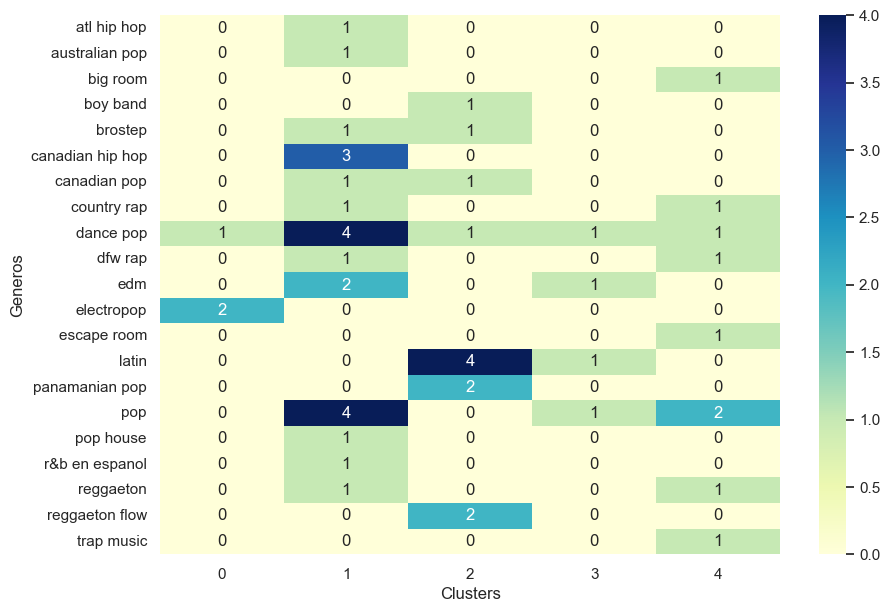

In [475]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [461]:
grouped = spotify.groupby(['Cluster', 'Genero']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, figsize=(10,7))
plt.ylabel('Número de Canciones')
plt.xlabel('Cluster')
plt.title('Distribución de Géneros por Cluster')
plt.show()


KeyError: 'Genero'

#### 4.1.5 Gráficos: grupos originales vs clusters creados

##### 4.1.5.1 Gráfico de barras para cada género

C:\Users\ixyz0\AppData\Local\Temp\ipykernel_20920\1377306194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify.groupby('Genre')['Cluster'].value_counts().unstack().plot(kind='bar', stacked=True)


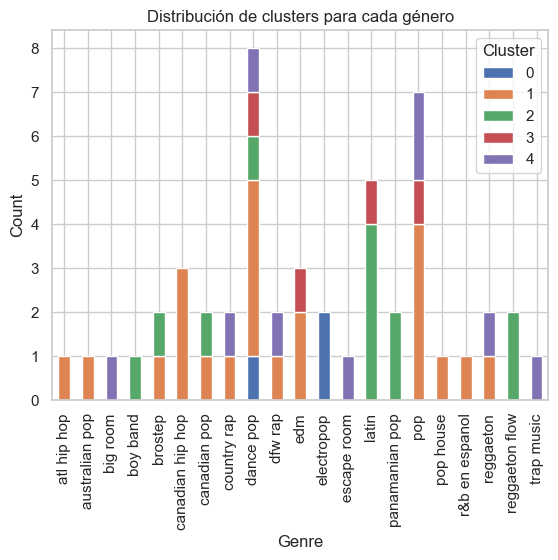

In [486]:
spotify.groupby('Genre')['Cluster'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Distribución de clusters para cada género')
plt.show()


##### 4.1.5.2 Gráfico de barras para cada cluster

C:\Users\ixyz0\AppData\Local\Temp\ipykernel_20920\1640857210.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify.groupby('Cluster')['Genre'].value_counts().unstack().plot(kind='bar', stacked=True)


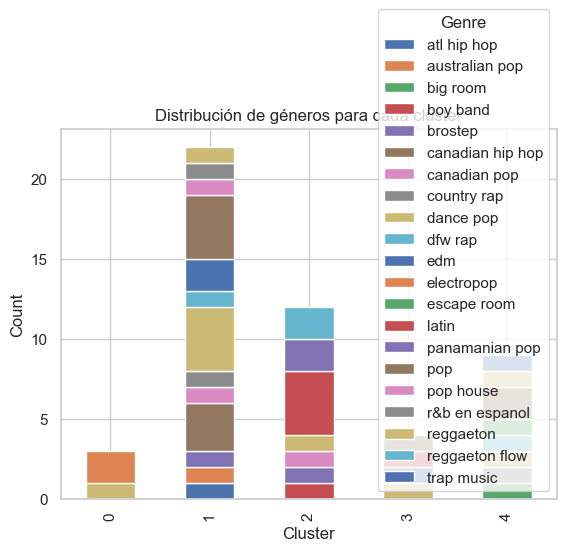

In [482]:
spotify.groupby('Cluster')['Genre'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Distribución de géneros para cada cluster')
plt.show()

### 4.2 Análisis Hierarchical Clustering

#### 4.2.1 Justificacion

### 4.3 Análisis Density-Based Clustering: DBSCAN

#### 4.3.1 Justificacion

## 5. Conclusiones

¿Qué diferencia hay entre el conjunto inicial y el final? ¿Qué tan importante es lanormalización en este proceso?

¿Qué puede concluir respecto de ambos métodos utilizados?, ¿entregan resultados similares?
saque conclusiones del trabajo realizado.